# Email Spam Detection

## Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

## Importing dataset 

In [2]:
df=pd.read_csv("spam.csv", encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Preparation and Exploration

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns={"v1":"label","v2":"text"},inplace=True)
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df["label"].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [15]:
df['label'].replace({"ham": 0, "spam": 1}, inplace=True)

## Data Visualization

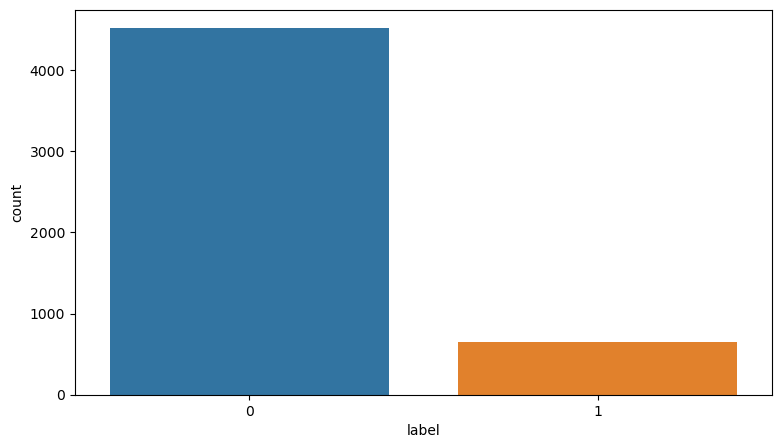

In [16]:
plt.figure(figsize=(9,5))
sns.countplot(x="label",data=df)
plt.show()

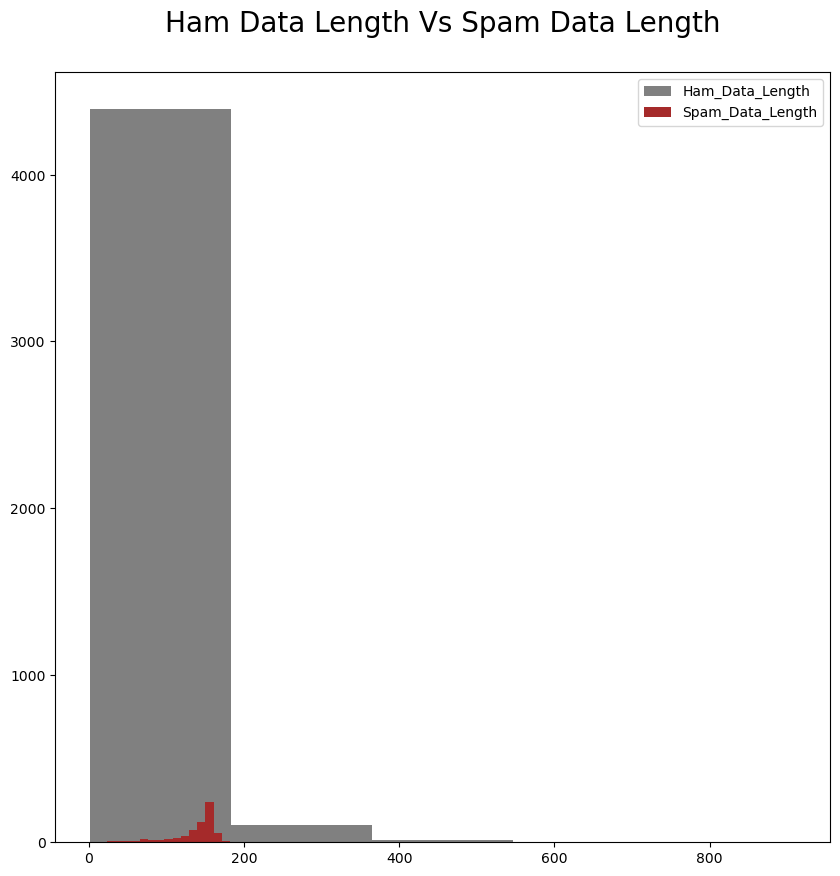

In [17]:
ham_data_length=df[df["label"]==0]["text"].str.len()
spam_data_length=df[df["label"]==1]["text"].str.len()
plt.figure(figsize=(10,10))
plt.hist(ham_data_length, bins=5,label='Ham_Data_Length',color="grey")
plt.hist(spam_data_length , bins=20, label='Spam_Data_Length',color="brown")
plt.title("Ham Data Length Vs Spam Data Length\n",fontsize=20,color="black")
plt.legend()
plt.show()

## Text Vectorization and Model Training

In [18]:
tf = TfidfVectorizer()
X = tf.fit_transform(df["text"])
Y = df["label"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 8672), (1034, 8672), (4135,), (1034,))

In [21]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier()

## Performance Metrics

In [22]:
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 97.00193423597679
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       889
           1       0.91      0.87      0.89       145

    accuracy                           0.97      1034
   macro avg       0.95      0.93      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Confusion Matrix:
[[877  12]
 [ 19 126]]


## Text Prediction

In [23]:
new_text = "This coupon entitles you to a free gift with your next purchase!."

new_text_processed = tf.transform([new_text])
prediction = dt_clf.predict(new_text_processed)

if prediction == 1:
    print("The email is predicted to be spam.")
else:
    print("The email is predicted to be non-spam (ham).")


The email is predicted to be spam.
